## Name: Sridhar Guggilla
## Student ID: 23021710

**Introduction: Breast Cancer Prediction with Regression**

This notebook explores using Logistic and Linear Regression to predict breast tumor types (benign or malignant) using the Wisconsin dataset. We'll compare model performance and visualize the results.


## Data Preparation

Getting our data ready for analysis: unzipping, loading, and cleaning.


In [13]:
!unzip -o breast+cancer+wisconsin+original.zip

Archive:  breast+cancer+wisconsin+original.zip
  inflating: Index                   
  inflating: breast-cancer-wisconsin.data  
  inflating: breast-cancer-wisconsin.names  
  inflating: unformatted-data        
  inflating: wdbc.data               
  inflating: wdbc.names              
  inflating: wpbc.data               
  inflating: wpbc.names              


### File Check

Confirming dataset extraction.

In [2]:
!ls


breast-cancer-wisconsin.data	      Index		wdbc.data   wpbc.names
breast-cancer-wisconsin.names	      sample_data	wdbc.names
breast+cancer+wisconsin+original.zip  unformatted-data	wpbc.data


### Loading the Data

Loading data into a DataFrame with defined column names.


In [14]:
import pandas as pd

column_names = [
    'Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
    'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size',
    'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'
]

data = pd.read_csv('breast-cancer-wisconsin.data', names=column_names, na_values=['?'])
# Directly handling missing values during loading
print(data.head())

   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

   Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0          1.0                3                1       

## Data Preprocessing

Cleaning and preparing data for model application.

### Handling Missing Values

Identifying and handling missing data for data integrity.



In [15]:
# Check if any missing values remain
print(data.isnull().sum())

# Dropping rows with missing values
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
print(data.head())

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64
   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5      

### Numerical Conversion


Converting categorical data to numerical format for model compatibility.


In [5]:
# Ensure 'Class' is integer
data['Class'] = data['Class'].astype(int)


### Splitting the Data

Dividing data into training and testing sets for model evaluation.


In [6]:
# Split the data into features and target variable
X = data.drop(['Sample code number', 'Class'], axis=1)
y = data['Class']


**Feature and Target Separation**

In [7]:
from sklearn.model_selection import train_test_split

# Split the data - 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Model Implementation

Applying Logistic and Linear Regression models.

### Logistic Regression

Predicting tumor type with probability using Logistic Regression.


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logreg = LogisticRegression(solver='liblinear') # Specifying a solver
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.9512195121951219
              precision    recall  f1-score   support

           2       0.94      0.98      0.96       127
           4       0.97      0.90      0.93        78

    accuracy                           0.95       205
   macro avg       0.96      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205



### Linear Regression

Using Linear Regression for comparison and applying a threshold for binary classification.


In [17]:
from sklearn.linear_model import LinearRegression
import numpy as np

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_cont = linreg.predict(X_test)

# Using a different threshold for better distinction
y_pred_lin = np.where(y_pred_cont > 2.5, 4, 2)

accuracy_lin = accuracy_score(y_test, y_pred_lin)
print(f'Linear Regression (thresholded) Accuracy: {accuracy_lin}')
print(classification_report(y_test, y_pred_lin))

Linear Regression (thresholded) Accuracy: 0.9707317073170731
              precision    recall  f1-score   support

           2       0.99      0.96      0.98       127
           4       0.94      0.99      0.96        78

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



**Performance Evaluation**

Assessing model performance with metrics like precision, recall, and F1-score.

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd


# Calculate metrics for both models
models = {'Logistic Regression': logreg, 'Linear Regression': linreg}
metrics = ['Precision', 'Recall', 'F1-score', 'ROC AUC']
results = {}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    if model_name == 'Linear Regression':
        y_pred = np.where(y_pred > 2.5, 4, 2)  # Apply threshold for Linear Regression

    results[model_name] = {
        'Precision': precision_score(y_test, y_pred, pos_label=4),
        'Recall': recall_score(y_test, y_pred, pos_label=4),
        'F1-score': f1_score(y_test, y_pred, pos_label=4),
        'ROC AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if model_name == 'Logistic Regression' else 'N/A'
        # ROC AUC only for Logistic Regression
    }

# Create and display the table
results_df = pd.DataFrame(results).T  # Transpose for desired format
results_df = results_df.rename_axis("Metric", axis="columns") # Rename the index column to 'Metric'

# Display using display() for better formatting in Colab
display(results_df)

Metric,Precision,Recall,F1-score,ROC AUC
Logistic Regression,0.972222,0.897436,0.933333,0.994953
Linear Regression,0.939024,0.987179,0.9625,N/A


## Results Visualization

To better interpret our models' performance, we visualize the results using confusion matrices and ROC curves.

### Confusion Matrices

The confusion matrices provide a clear picture of true versus false predictions for each model.


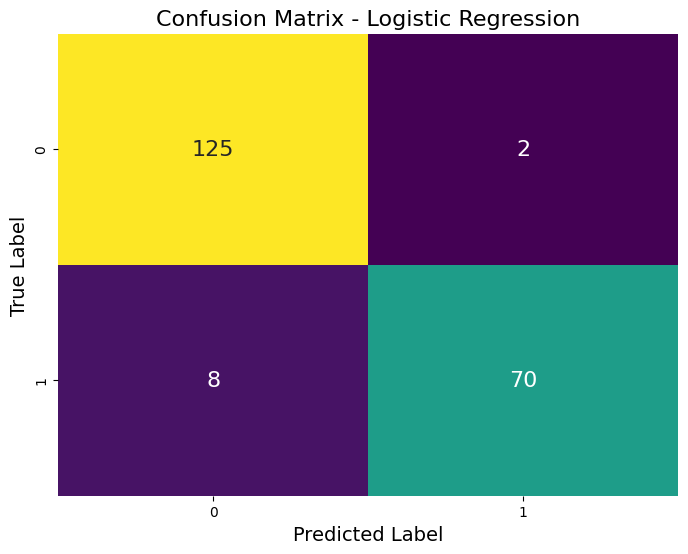

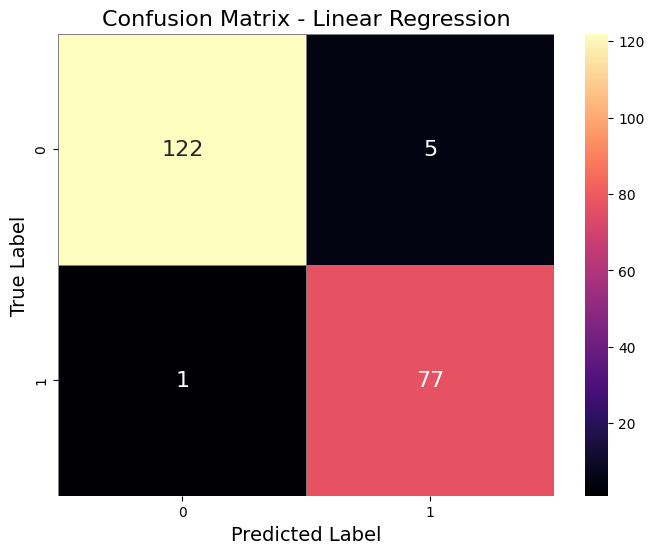

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Logistic Regression Confusion Matrix with updated style
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis',
            cbar=False, annot_kws={"size": 16}) # Changed colormap and removed colorbar
plt.title('Confusion Matrix - Logistic Regression', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

# Linear Regression Confusion Matrix with updated style
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lin), annot=True, fmt='d', cmap='magma',
            linewidths=.5, linecolor='gray', annot_kws={"size": 16}) # Added lines and changed colormap
plt.title('Confusion Matrix - Linear Regression', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

### ROC Curve for Logistic Regression

Assessing the diagnostic ability of Logistic Regression.


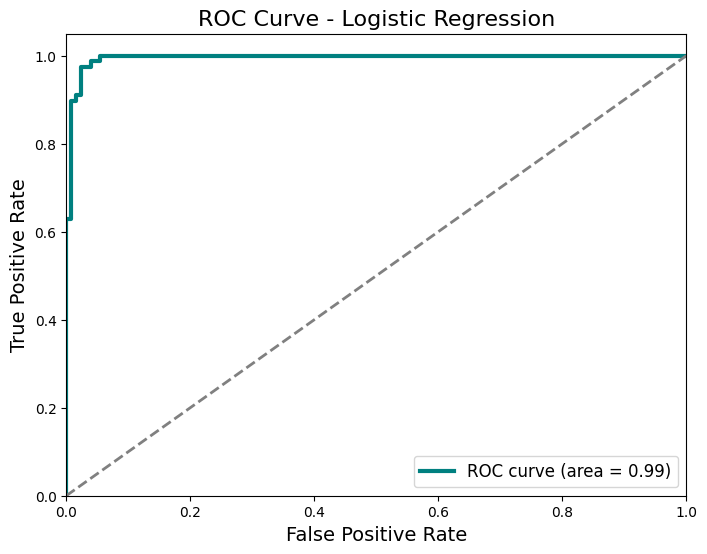

In [19]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1], pos_label=4)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='teal', lw=3, label='ROC curve (area = %0.2f)' % roc_auc) # Changed color and line width
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve - Logistic Regression', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.show()

,Precision,Recall,F1-score,ROC AUC
Logistic Regression,0.972222,0.897436,0.933333,0.994953
Linear Regression,0.939024,0.987179,0.9625,N/A


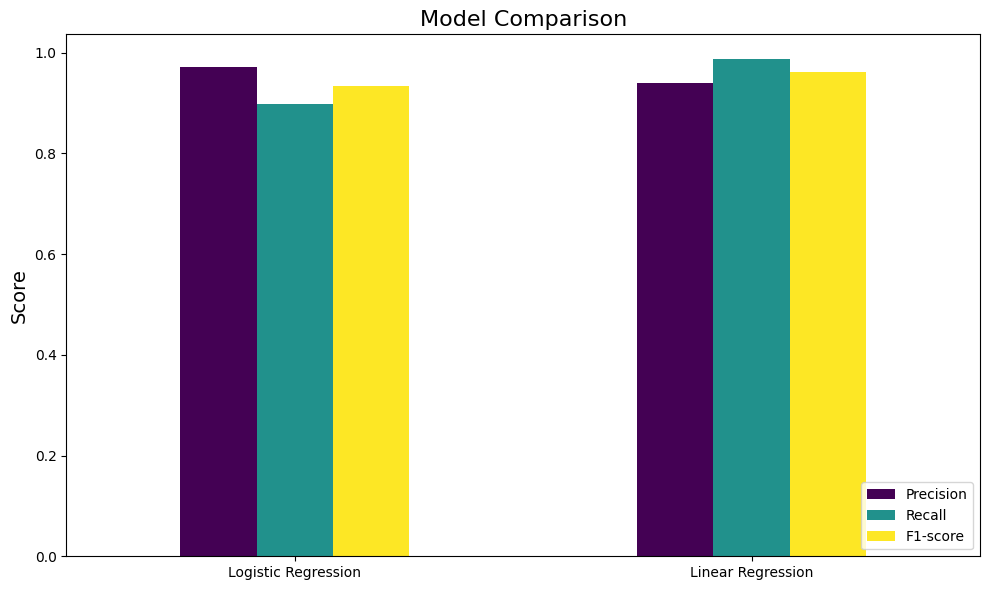

In [20]:
# --- Additional Comparisons ---

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Calculate metrics for both models
models = {'Logistic Regression': logreg, 'Linear Regression': linreg}
metrics = ['Precision', 'Recall', 'F1-score', 'ROC AUC']
results = {}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    if model_name == 'Linear Regression':
        y_pred = np.where(y_pred > 2.5, 4, 2)  # Apply threshold for Linear Regression

    results[model_name] = {
        'Precision': precision_score(y_test, y_pred, pos_label=4),
        'Recall': recall_score(y_test, y_pred, pos_label=4),
        'F1-score': f1_score(y_test, y_pred, pos_label=4),
        'ROC AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if model_name == 'Logistic Regression' else 'N/A'
        # ROC AUC only for Logistic Regression
    }

# Display results in a table
results_df = pd.DataFrame(results).T  # Transpose for better readability
display(results_df)

# Visual comparison using bar plot
results_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Model Comparison', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()